In [16]:
import astropy.constants as const
import numpy as np
import pyvo
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
def get_M_biomass(luminosity, eff = 0.01, energy_per_biomass_unit = 1000):
    return luminosity * eff / energy_per_biomass_unit

In [54]:
def get_star_life_expectancy(M_star, t_sun = 10**10, M_sun = const.M_sun.value): #t_star u godinama
    return t_sun * (M_star/M_sun)**(-2.5)

In [7]:
def get_BIOTA(M_biomass, tf, to = 0):
    return M_biomass*(tf-to)

In [31]:
def get_luminosity(R, T):
    return 4*np.pi*((R*const.R_sun.value)**2)*const.sigma_sb.value*T**4

In [49]:
def BIOTA_wrap(luminosity, M_star):
    biomass = get_M_biomass(luminosity)
    tf = get_star_life_expectancy(M_star)
    return get_BIOTA(biomass, tf)

In [8]:
service = pyvo.dal.TAPService("http://voparis-tap-planeto.obspm.fr/tap")

In [24]:
query1 = "SELECT star_mass, star_radius, star_teff FROM exoplanet.epn_core WHERE star_mass is not NULL and star_radius is not NULL and star_teff is not NULL"
tabela1 = service.search(query1)
tabela1 = tabela1.to_table()

In [25]:
tabela1

star_mass,star_radius,star_teff
solMass,solRad,K
float64,float64,float64
2.7,19.0,4742.0
1.8,24.08,4340.0
2.2,11.0,4813.0
0.9,0.708,5311.0
0.9,0.708,5311.0
1.01,0.98,5766.0
...,...,...
0.783,0.793,5344.0


In [26]:
df = tabela1.to_pandas()

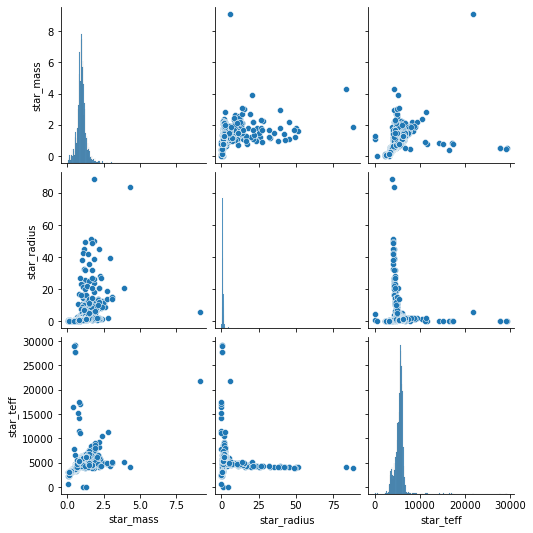

In [27]:
sb.pairplot(df)

In [47]:
lum = []
for ind in df.index:
    lum.append(get_luminosity(df['star_radius'][ind], df['star_teff'][ind])/const.L_sun.value)


In [50]:
df['luminosity'] = lum

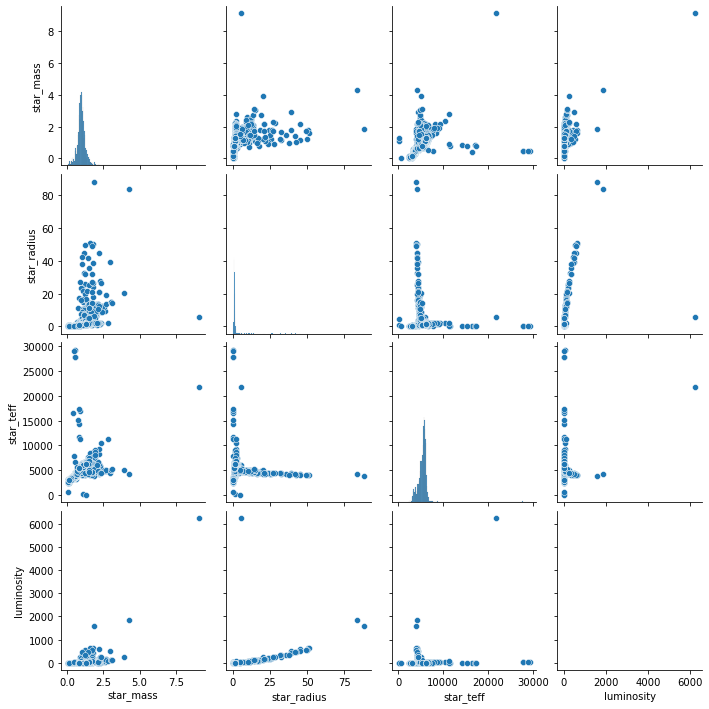

In [52]:
sb.pairplot(df)

In [58]:
biota = []
for ind in df.index:
    biota.append(BIOTA_wrap(df['luminosity'][ind], df['star_mass'][ind]))

In [59]:
np.shape(biota)

(4138,)

In [60]:
df['biota'] = biota

/home/zuwuch/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='biota', ylabel='star_mass'>

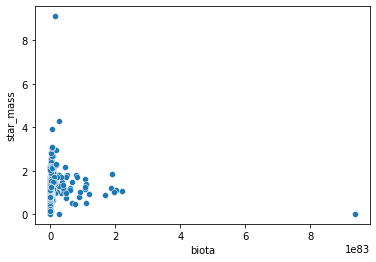

In [61]:
sb.scatterplot(df['biota'], df['star_mass'])

/home/zuwuch/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='biota', ylabel='star_radius'>

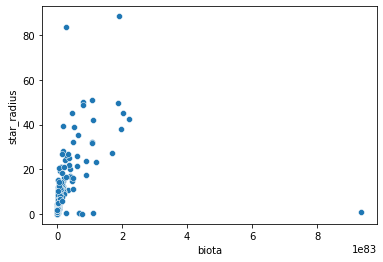

In [62]:
sb.scatterplot(df['biota'], df['star_radius'])

/home/zuwuch/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='biota', ylabel='star_teff'>

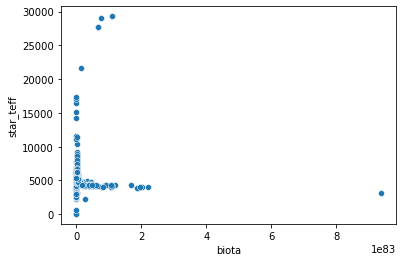

In [63]:
sb.scatterplot(df['biota'], df['star_teff'])

/home/zuwuch/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='biota', ylabel='luminosity'>

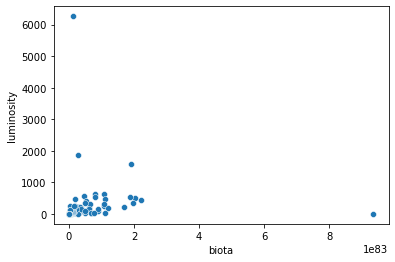

In [64]:
sb.scatterplot(df['biota'], df['luminosity'])

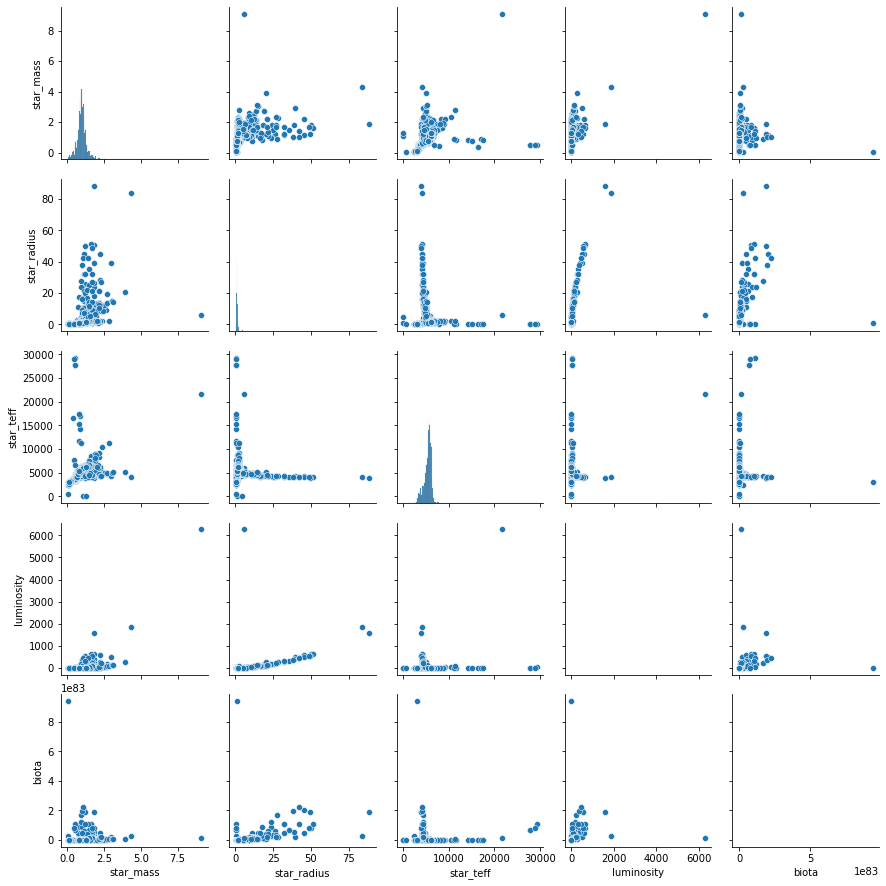

In [65]:
sb.pairplot(df)